<a href="https://colab.research.google.com/github/Preetham253/Introduction-to-Tensorflow-from-Coursera/blob/main/Basic_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0



The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
This dataset is available directly in the tf.keras.datasets API and you load it like this:

In [2]:
#Load the Fashion MNIST dataset
fashion = tf.keras.datasets.fashion_mnist

In [3]:
#Load the training and testing split of the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Label: 2

Image Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0   0 145 116  14   9   7  85  51   0   0   0   2   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  41 135 242 242 250 255 251 243 251 232 165  49   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   6 196 247 252 238 229 232 231 232 236 231 233 248 246 217  85   0   0   0   0   0   0]
 [  0   0   0   0   0   0 187 253 226 230 232 233 232 231 233 233 231 234 227 228 239 251  53   0   0   0   0   0]
 [  0   0   0   0   0  11 235 229 233 231 234 233 233 234 232 231 231 230 233 231 225 246 175   0   0   0   0   0]
 [  0   0   0   0   0  55 247 230 236 234 232 233 233 232 233 232 234 231 231 231 230 243 207   0   0   0   0   0]
 [  0   0   0   0   0 101 250 230 240 232 229 232 229 228 230 228 227 228 229 226 235 238 243   0   0   0   0   0]
 [  0   0   0   0   0 164 249 232 246 233 229 230 223 227 229 228 227 227 228 230 236 233 255   0   0   0   0   0]
 [  0   0   0   0   0 196 245 233 250 233 230 231 

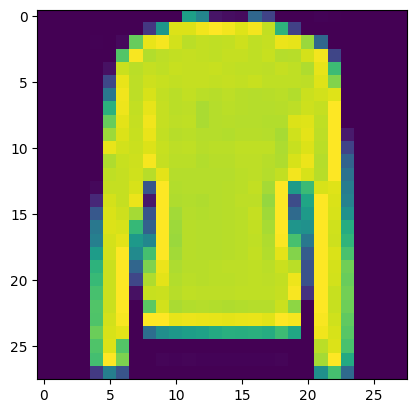

In [5]:
#Analyse the image and the corresponding label
import numpy as np
import matplotlib.pyplot as plt
#set the index of the image
index = 891
#set number of characters per row when printing
np.set_printoptions(linewidth=320)
#print the label and image
print(f'Label: {train_labels[index]}')
print(f'\nImage Pixel Array:\n {train_images[index]}')
#Visualize the image
plt.imshow(train_images[index])

All of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization.

In [6]:
#Normalize the pixel values of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
#Build the image classification model
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons
Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0:
  return x

else:
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth.

In [8]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[4.0, 7.0, 1.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[4. 7. 1. 2.]]
output of softmax function: [[0.04701312 0.9442837  0.00234065 0.00636253]]
sum of outputs: 1.0
class with highest probability: 1


In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5009 - accuracy: 0.8260
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3720 - accuracy: 0.8671
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3366 - accuracy: 0.8770
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2814 - accuracy: 0.8958
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2691 - accuracy: 0.9002
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2590 - accuracy: 0.9044
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2469 - accuracy: 0.9074
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [11]:
#Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3535 - accuracy: 0.8810


[0.35347500443458557, 0.8809999823570251]

The accuracy here to be about 0.88

In [12]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[7.2873034e-11 9.3906376e-12 6.8441793e-12 8.1665669e-10 4.3612877e-10 2.7218908e-05 3.2903576e-11 2.2113353e-03 2.3781018e-07 9.9776125e-01]


In [13]:
print(test_labels[0])

9
